In [953]:
import pandas as pd

### Étape n°1 : Récupérer les jeux de données

In [954]:
df_anim = pd.read_csv('df_anim.csv')
df_veg = pd.read_csv('df_veg.csv')
df_pop = pd.read_csv('df_pop.csv')

In [955]:
df_anim.sample(1)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
12157,FBS,Food Balances (2010-),266,Gabon,674,Protein supply quantity (g/capita/day),S2732,Mutton & Goat Meat,2019,2019,g/capita/day,0.28,E,Estimated value


In [956]:
df_veg.sample(1)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
37007,FBS,Food Balances (2010-),230,Ethiopia PDR,684,Fat supply quantity (g/capita/day),S2611,"Oranges, Mandarines",2019,2019,NaN,NaN,NaN,NaN


In [957]:
df_pop.sample(1)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
344,FBS,Food Balances (2010-),768,Togo,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,7889.0,X,Figure from international organizations


### Étape n°2 : Nettoyage et préparation des données

1. Nettoyer les titres de colonnes :  
Supprimer les espaces au début et à la fin des titres (s’il y en a)  
Remplacer les espaces par des underscores (ceux se situant entre les mots)  
Tout mettre en minuscule  


In [958]:
df_anim.columns = df_anim.columns.str.replace(' ', '_')
df_anim.columns = df_anim.columns.str.lower()
df_anim.head(1)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value


In [959]:
df_veg.columns = df_veg.columns.str.replace(' ', '_')
df_veg.columns = df_veg.columns.str.lower()
df_veg.head(1)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value


In [960]:
df_pop.columns = df_pop.columns.str.replace(' ', '_')
df_pop.columns = df_pop.columns.str.lower()
df_pop.columns

Index(['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code',
       'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description'],
      dtype='object')

2. Quelle sont les dimensions des jeux de données ?

In [961]:
df_anim.shape

(35512, 14)

In [962]:
df_veg.shape

(115800, 14)

In [963]:
df_pop.shape

(386, 14)

3. A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [964]:
df_anim.head()

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value


In [965]:
df_veg.head()

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value


In [966]:
df_pop.head()

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,37172.00,X,Figure from international organizations
1,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,38041.75,X,Figure from international organizations
2,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,2883.00,X,Figure from international organizations
3,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,2880.92,X,Figure from international organizations
4,FBS,Food Balances (2010-),12,Algeria,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,42228.00,X,Figure from international organizations


4. Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’.  
Une fois cette étape effectuée, regroupez les deux jeux de données en 1 et appelez ce DataFrame product.  
Attention à bien comprendre la structure des données pour utiliser la bonne méthode.


In [967]:
df_anim['type'] = 'animal'
df_veg['type'] = 'vegetal'
product = pd.concat([df_anim, df_veg])

5. Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. Renommer la colonne ‘value’ en ‘pop_1000_hab’.


In [968]:
df_pop = df_pop[['area_code_(m49)', 'area', 'year', 'value']]
df_pop = df_pop.rename(columns={'value':'pop_1000_hab'})
df_pop.columns

Index(['area_code_(m49)', 'area', 'year', 'pop_1000_hab'], dtype='object')

6. Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit, value.

In [969]:
product = product[['area_code_(m49)', 'area', 'element', 'item', 'year', 'type', 'unit', 'value']]
product.columns

Index(['area_code_(m49)', 'area', 'element', 'item', 'year', 'type', 'unit',
       'value'],
      dtype='object')

7. Fusionnez df_pop avec products et nommez ce DataFrame df.  
Afin de fusionner ces jeux de données vous devez identifier les clés primaires.  
Renommer les colonnes comme sur la capture d’écran ci-dessous.  
Note : ajouter la population à la base de données créera de la redondance dans la bdd mais simplifiera les calculs pour les questions suivantes.  
Ne pas supprimer df_pop.


In [970]:
product.head()

,area_code_(m49),area,element,item,year,type,unit,value
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2018,animal,kg,2.62
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2019,animal,kg,2.73
2,4,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2018,animal,kcal/capita/day,15.42
3,4,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2019,animal,kcal/capita/day,16.03
4,4,Afghanistan,Protein supply quantity (g/capita/day),Bovine Meat,2018,animal,g/capita/day,1.09


In [971]:
df_pop.head()

,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,37172.00
1,4,Afghanistan,2019,38041.75
2,8,Albania,2018,2883.00
3,8,Albania,2019,2880.92
4,12,Algeria,2018,42228.00


8. Quelles sont les types de données de chaque colonne ?

In [972]:
df = product.merge(df_pop, on=['area_code_(m49)', 'area', 'year'])
df.sample(1)

,area_code_(m49),area,element,item,year,type,unit,value,pop_1000_hab
120449,688,Serbia,Food supply (kcal/capita/day),Maize and products,2019,vegetal,kcal/capita/day,239.19,8772.24


In [973]:
df_pop.shape

(386, 4)

9. Combien y-a t’il de valeurs manquantes par variable ?

In [974]:
df.isnull().sum()

area_code_(m49)        0
area                   0
element                0
item                   0
year                   0
type                   0
unit               26312
value              26312
pop_1000_hab        7840
dtype: int64

In [975]:
df.shape

(151312, 9)

10. Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.

In [976]:
df[['value','pop_1000_hab']].describe()

,value,pop_1000_hab
count,125000.000000,1.434720e+05
mean,11.001024,4.963594e+04
std,56.218072,1.828688e+05
min,-0.030000,1.076000e+01
25%,0.000000,2.494530e+03
50%,0.190000,9.726560e+03
75%,2.800000,3.081000e+04
max,1779.760000,1.465634e+06


In [977]:
df.value.idxmin() #83358
df.loc[[83358]]

,area_code_(m49),area,element,item,year,type,unit,value,pop_1000_hab
83358,458,Malaysia,Protein supply quantity (g/capita/day),Palm Oil,2018,vegetal,g/capita/day,-0.03,31528.0


<p style='color:gray'> ^^^ mis à part la valeur négative de cette ligne</style>

11. Affichez les valeurs uniques de la colonne area

In [978]:
df.area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethi

13. Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item.  
Les valeurs de la colonne element doivent être séparées dans des colonnes différentes.  
Recherchez sur internet la différence entre les formats long et les formats wide.  
Pour réussir cette étape creuser la méthode pivot_table.  
Il est préférable d’appliquer la méthode reset_index() après avoir utilisé la méthode précédente.

In [979]:
df = df.rename(columns={'area_code_(m49)':'area_code'})

In [980]:
df = pd.pivot_table(df, values='value', index=['area_code', 'area', 'year', 'pop_1000_hab', 'type', 'item'], columns='element')
df = df.reset_index()
df.head()

element,area_code,area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,4,Afghanistan,2018,37172.0,animal,Bovine Meat,1.20,15.42,2.62,1.09
1,4,Afghanistan,2018,37172.0,animal,"Butter, Ghee",2.50,22.14,1.00,0.03
2,4,Afghanistan,2018,37172.0,animal,Cream,0.02,0.23,0.04,0.00
3,4,Afghanistan,2018,37172.0,animal,Demersal Fish,0.00,0.13,0.15,0.03
4,4,Afghanistan,2018,37172.0,animal,Eggs,0.44,6.06,1.55,0.45


14. Faire du nettoyage dans le nom des colonnes

In [981]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.columns

Index(['area_code', 'area', 'year', 'pop_1000_hab', 'type', 'item',
       'fat_supply_quantity_(g/capita/day)', 'food_supply_(kcal/capita/day)',
       'food_supply_quantity_(kg/capita/yr)',
       'protein_supply_quantity_(g/capita/day)'],
      dtype='object', name='element')

15. Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018

In [982]:
df_2018 = df[df.year == 2018]
df_2018.sample(2)

element,area_code,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
19126,499,Montenegro,2018,628.0,animal,"Aquatic Animals, Others",0.00,0.10,0.05,0.01
2372,56,Belgium,2018,11482.0,vegetal,"Oranges, Mandarines",0.07,43.31,62.74,0.65


16.  Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique. Pour cela rendez-vous sur le site de la FAO, votre objectif est de télécharger des nouveaux datasets pour ajouter les zones suivantes à votre jeu de données : 'eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america', 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia'

In [983]:
regions = [
    'eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa',   #africa
    'northern_america', 'central_america', 'caribbean', 'south_america',                         #america
    'central_asia', 'eastern_asia', 'southern_asia', 'south_eastern_asia', 'western_asia',       #asia
    'eastern_europe', 'northern_europe', 'southern_europe', 'western_europe',                    #europe
    'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia']                             #oceania

df['region'] = ''

In [984]:
for reg in regions:
    dftemp = pd.read_csv('zones_geographiques/'+reg+'.csv')
    for index in range(len(df)):
        if df.area_code.loc[index] in dftemp['Area Code (M49)'].values:
            df.region.loc[index] = reg

/tmp/ipykernel_38356/2376142818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.region.loc[index] = reg
/tmp/ipykernel_38356/2376142818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.region.loc[index] = reg
/tmp/ipykernel_38356/2376142818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.region.loc[index] = reg
/tmp/ipykernel_38356/2376142818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [985]:
df[['area_code', 'area', 'region']].sample(3)

element,area_code,area,region
29695,818,Egypt,northern_africa
24276,662,Saint Lucia,caribbean
26510,724,Spain,southern_europe


Le cas de la Chine :

In [986]:
df.loc[df.region == '',:]

element,area_code,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),region
6054,159,China,2018,1459378.00,animal,"Aquatic Animals, Others",0.00,0.56,0.69,0.07,
6055,159,China,2018,1459378.00,animal,Aquatic Plants,0.05,12.71,13.00,0.97,
6056,159,China,2018,1459378.00,animal,Bovine Meat,2.21,28.80,5.60,2.10,
6057,159,China,2018,1459378.00,animal,"Butter, Ghee",0.36,3.21,0.16,0.00,
6058,159,China,2018,1459378.00,animal,Cephalopods,0.01,0.97,0.50,0.19,
...,...,...,...,...,...,...,...,...,...,...,...
6235,159,China,2019,1465634.16,vegetal,Tomatoes and products,0.29,18.70,35.75,1.07,
6236,159,China,2019,1465634.16,vegetal,"Vegetables, other",1.93,213.68,321.88,12.39,
6237,159,China,2019,1465634.16,vegetal,Wheat and products,3.15,580.98,66.52,18.65,
6238,159,China,2019,1465634.16,vegetal,Wine,0.00,3.48,1.86,0.00,


In [987]:
# La Chine n'a pas été pris en compte dans le code du dessus
df[['area_code', 'area', 'region']][df.area == 'China'].sample(3)
#Car ici le code de la Chine est 159

element,area_code,area,region
6179,159,China,
6135,159,China,
6055,159,China,


In [988]:
china_codes = pd.read_csv('zones_geographiques/eastern_asia.csv')
china_codes.loc[0:3]
#Alors que dans le csv pour avoir la zone regionale la Chine est divisée en 4 autres codes

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),344,"China, Hong Kong SAR",511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,7436.15,X,Figure from international organizations
1,FBS,Food Balances (2010-),446,"China, Macao SAR",511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,640.45,X,Figure from international organizations
2,FBS,Food Balances (2010-),156,"China, mainland",511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,1433783.69,X,Figure from international organizations
3,FBS,Food Balances (2010-),158,"China, Taiwan Province of",511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,23773.88,X,Figure from international organizations


In [989]:
#on rentre la region de la chine à la main
df['region'][df.area == 'China'] = 'eastern_asia'

/tmp/ipykernel_38356/1375035010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'][df.area == 'China'] = 'eastern_asia'


In [990]:
df[['area_code', 'area', 'region']][df.area == 'China'].sample(3)

element,area_code,area,region
6153,159,China,eastern_asia
6139,159,China,eastern_asia
6216,159,China,eastern_asia


In [991]:
df.loc[df.region == '',:]
#Plus de str vide

element,area_code,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),region


In [992]:
import numpy as np
df[['area_code', 'area', 'region']][df.region == np.NAN].head()
#plus de NAN non plus

element,area_code,area,region


### Étape n°3: Exploration


1. Quelle est la médiane de la variable fat_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? (il existe une méthode pour visualiser toutes ces informations en même temps). Interprétez ces mesures statistiques dans une phrase.

In [993]:
df['fat_supply_quantity_(g/capita/day)'].describe()

count    31206.000000
mean         1.072235
std          3.486319
min          0.000000
25%          0.000000
50%          0.030000
75%          0.360000
max         83.770000
Name: fat_supply_quantity_(g/capita/day), dtype: float64

<p style='color:gray'>^^^ on observe le maximum est 83 fois supérieur à la moyenne. La mediane est bien inférieure à la moyenne. Ce qui veut dire qu'on aura une grande disparité,et que les valeurs fortes seront concentrés sur certains pays, probablement.</p> 

2. Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)

In [994]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [995]:
cols_num = df.select_dtypes(include=[int, float])
cols_num

element,area_code,year,pop_1000_hab,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,2018,37172.00,1.20,15.42,2.62,1.09
1,4,2018,37172.00,2.50,22.14,1.00,0.03
2,4,2018,37172.00,0.02,0.23,0.04,0.00
3,4,2018,37172.00,0.00,0.13,0.15,0.03
4,4,2018,37172.00,0.44,6.06,1.55,0.45
...,...,...,...,...,...,...,...
31423,894,2019,17861.03,0.00,0.12,0.11,0.03
31424,894,2019,17861.03,0.01,0.78,1.40,0.04
31425,894,2019,17861.03,0.10,12.54,17.94,0.72
31426,894,2019,17861.03,0.26,62.61,7.58,1.86


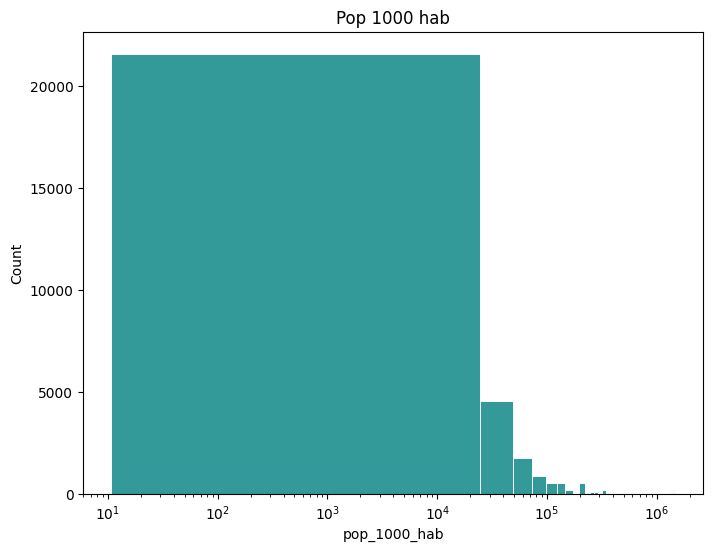

In [996]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['pop_1000_hab'], bins=60, kde=False, color='teal', alpha=0.8, edgecolor='white')
plt.xscale('log')
plt.title('Pop 1000 hab')
plt.show()

3. Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)

.loc

In [997]:
df_pop.pop_1000_hab.loc[df_pop.area == 'Ukraine'][df_pop.year == 2018].values[0].astype(int)*1000

44246000

.iloc

In [998]:
int(df_pop.iloc[356,3])*1000

44246000

.iat

In [999]:
int(df_pop.iat[356,3])*1000

44246000

.at

In [1000]:
df_pop.at[356, 'pop_1000_hab'].astype(int)*1000


44246000

3. Quels sont les 10 pays les plus peuplés ?

In [1001]:
df_pop[['area_code_(m49)', 'area', 'pop_1000_hab']][df_pop.year==2018].sort_values('pop_1000_hab', ascending=False).iloc[0:3]
#la chine apparaît deux fois

,area_code_(m49),area,pop_1000_hab
68,159,China,1459378.00
74,156,"China, mainland",1427648.00
162,356,India,1352642.28


In [1002]:

df_pop = df_pop.drop(df_pop[df_pop.area == 'China'].index)
df_pop[['area_code_(m49)', 'area', 'pop_1000_hab']][df_pop.year==2018].sort_values('pop_1000_hab', ascending=False).iloc[0:10]

,area_code_(m49),area,pop_1000_hab
74,156,"China, mainland",1427648.00
162,356,India,1352642.28
364,840,United States of America,327096.00
164,360,Indonesia,267671.00
264,586,Pakistan,212228.00
46,76,Brazil,209469.00
256,566,Nigeria,195875.00
24,50,Bangladesh,161377.00
288,643,Russian Federation,145734.00
178,392,Japan,127202.00


4. Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ? Menez votre enquête et faites les corrections nécessaires en cas de problème. Contrôlez vos données grâce à ce site. (Si l’erreur est de l’ordre de quelques dizaines de millions, c’est peut-être la méthode de calcul mais si c’est supérieur à 1 milliard, il y a une erreur dans la façon dont vous avez récupérer les données)


In [1003]:
print(format(df_pop.pop_1000_hab[df_pop.year==2018].sum().astype(int)*1000, '_d')+ ' hab : Population mondiale en 2018')

7_572_928_000 hab : Population mondiale en 2018


In [1004]:
print(format(df_pop.pop_1000_hab[df_pop.year==2019].sum().astype(int)*1000, '_d')+ ' hab : Population mondiale en 2019')

7_668_812_000 hab : Population mondiale en 2019


5. Pour quels pays dispose-t-on du moins d’informations (nombre de valeurs manquantes) ? Donnez-en 5.

In [1005]:
df.isnull().sum()

element
area_code                                   0
area                                        0
year                                        0
pop_1000_hab                                0
type                                        0
item                                        0
fat_supply_quantity_(g/capita/day)        222
food_supply_(kcal/capita/day)             263
food_supply_quantity_(kg/capita/yr)         7
protein_supply_quantity_(g/capita/day)    220
region                                      0
dtype: int64

In [1006]:
df.fillna('')
df.groupby(['area']).value_counts('').sort_values(ascending=False).head()

area
Sudan      187
Senegal    186
Nepal      186
China      186
Nigeria    185
dtype: int64

7. Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. Affichez les 5 pays avec le taux de croissance démographique le plus élevé

In [1007]:
df_pop.set_index('area').groupby('area')

In [1008]:
df_pivot = pd.pivot_table(data=df_pop, index='area', columns='year', values='pop_1000_hab')
df_pivot['taux_croissance_pop_18_19_(%)'] = round(((df_pivot[2019] - df_pivot[2018]) / df_pivot[2018])*100, 2)
# (vA - vD) / vD
df = df.merge(df_pivot, on=['area'])
df = df.drop([2018, 2019], axis=1)

In [1009]:
df[['area','region','taux_croissance_pop_18_19_(%)']].sample(1)

,area,region,taux_croissance_pop_18_19_(%)
18453,Mexico,central_america,1.1


In [1010]:
df[['taux_croissance_pop_18_19_(%)', 'area']].groupby(['area']).mean().sort_values(by='taux_croissance_pop_18_19_(%)', ascending=False).head()

,taux_croissance_pop_18_19_(%)
area,
Niger,3.87
Uganda,3.61
Angola,3.30
Democratic Republic of the Congo,3.24
Burundi,3.18


8. Quel est le taux de croissance moyen en fonction de la zone géographique ?

In [1011]:
df.groupby('region')[['taux_croissance_pop_18_19_(%)']].mean()

,taux_croissance_pop_18_19_(%)
region,
australia_new_zealand,1.033886
caribbean,0.644036
central_america,1.373644
central_asia,1.717017
eastern_africa,2.331670
eastern_asia,0.606860
eastern_europe,-0.218961
melanesia,1.738296
micronesia,1.390000


9. Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !

In [1012]:
df9 = df[['area', 'food_supply_(kcal/capita/day)', 'protein_supply_quantity_(g/capita/day)', 'pop_1000_hab']].groupby(['area']).sum()
df9['total_protein_(kg/yr)'] = round(df9['protein_supply_quantity_(g/capita/day)'] * (df9.pop_1000_hab * 1000) * 365)
df9['total_food_(kcal/yr)'] = round(df9['food_supply_(kcal/capita/day)'] * df9.pop_1000_hab)
df9


,food_supply_(kcal/capita/day),protein_supply_quantity_(g/capita/day),pop_1000_hab,total_protein_(kg/yr),total_food_(kcal/yr)
area,,,,,
Afghanistan,4506.42,113.71,6016230.25,2.496985e+14,2.711166e+10
Albania,6612.33,228.32,475522.36,3.962851e+13,3.144311e+09
Algeria,6851.01,182.43,7334170.30,4.883600e+14,5.024647e+10
Angola,4856.67,101.26,5479064.94,2.025057e+14,2.661001e+10
Antigua and Barbuda,4937.39,162.20,16995.68,1.006195e+12,8.391430e+07
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),4461.40,104.46,5137738.87,1.958912e+14,2.292151e+10
Viet Nam,5873.89,173.52,16320689.35,1.033668e+15,9.586593e+10
Yemen,4074.07,105.57,5103322.88,1.966466e+14,2.079129e+10


10. Calculez le ratio énergie/poids de chaque produit et pays. Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, calculez la moyenne de ce ratio pour chaque aliment.  Attention à bien gérer les valeurs égales à 0. Vérifiez la cohérence de votre calcul en comparant le résultat avec l’apport calorique d’un œuf.


In [1013]:
df10 = df
#calcul de la densité energétique : nb calorie / poids en g
df10['densite_energetique_(cal/100g)'] = round(((df['food_supply_(kcal/capita/day)']) / (df['food_supply_quantity_(kg/capita/yr)']/365))/10,2)
# on remplace les nan par 0 sur la nouvelle colonne 
df10['densite_energetique_(cal/100g)'] = df10['densite_energetique_(cal/100g)'].fillna(0)
df10[['item','food_supply_(kcal/capita/day)', 'food_supply_quantity_(kg/capita/yr)', 'densite_energetique_(cal/100g)']].sample(3)

,item,food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),densite_energetique_(cal/100g)
3421,"Roots, Other",1.00,0.40,91.25
28846,Milk - Excluding Butter,69.70,40.25,63.21
26843,Coffee and products,0.42,0.24,63.88


In [1014]:
df10[['area', 'year', 'item', 'densite_energetique_(cal/100g)']][df10.item == 'Eggs']
#Valeur nutitrive d'un oeuf selon internet : 145cal/100g

,area,year,item,densite_energetique_(cal/100g)
4,Afghanistan,2018,Eggs,142.70
85,Afghanistan,2019,Eggs,146.82
168,Albania,2018,Eggs,136.56
250,Albania,2019,Eggs,136.66
333,Algeria,2018,Eggs,123.10
...,...,...,...,...
30815,Samoa,2019,Eggs,145.39
30895,Yemen,2018,Eggs,142.30
30983,Yemen,2019,Eggs,142.37
31072,Zambia,2018,Eggs,123.09


In [1015]:
df10_pivot = pd.pivot_table(df10, index='area', columns='item', values='densite_energetique_(cal/100g)').fillna('')
df10_pivot

item,"Alcohol, Non-Food",Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Beer,"Beverages, Alcoholic","Beverages, Fermented",...,Sunflower seed,Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products,Wine,Yams
area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,,48.995,,,59.935,324.155,0.0,36.5,,36.5,...,,883.475,,61.500,40.090,14.695,20.335,312.720,,
Albania,,48.945,0.0,0.0,59.995,258.285,335.16,49.005,294.425,27.375,...,,883.855,54.75,46.435,27.980,18.160,22.910,282.155,68.36,
Algeria,,48.03,0.0,0.0,60.025,261.045,336.745,43.005,289.19,0.0,...,,883.69,0.0,122.585,39.540,21.705,25.830,280.490,68.835,
Angola,,46.755,0.0,0.0,69.99,0.0,335.895,42.995,296.425,45.275,...,,882.19,96.005,39.655,45.625,20.555,22.385,259.440,68.13,
Antigua and Barbuda,,50.47,,0.0,60.005,,341.92,36.0,294.94,47.77,...,333.06,930.245,87.065,39.975,39.825,28.680,31.670,309.035,85.085,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),,43.345,0.0,0.0,61.99,0.0,337.07,35.98,294.5,0.0,...,383.25,863.405,87.565,49.615,18.250,17.050,22.965,279.545,70.51,90.065
Viet Nam,,42.035,30.42,0.0,63.01,0.0,339.38,49.0,226.07,49.275,...,246.375,810.3,94.97,223.690,39.910,26.480,21.855,279.860,68.53,
Yemen,,47.315,0.0,0.0,59.985,122.045,341.125,21.29,0.0,0.0,...,0.0,868.825,109.5,116.465,39.810,19.945,31.870,293.740,0.0,


In [1016]:
# calculer le ratio moyen de chaque aliment
df_10 = df
df_10 = df_10.groupby('item').mean(numeric_only=True)
df_10 = df_10.rename(columns={'densite_energetique_(cal/100g)':'densite_energetique_moyenne_(cal/100g)'})
df_10 = df_10.fillna(0)
df = df.merge(df_10['densite_energetique_moyenne_(cal/100g)'], on='item')
df.sample(3)

,area_code,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),region,taux_croissance_pop_18_19_(%),densite_energetique_(cal/100g),densite_energetique_moyenne_(cal/100g)
2805,670,Saint Vincent and the Grenadines,2018,110.0,animal,"Meat, Other",0.05,0.62,0.09,0.05,caribbean,0.54,251.44,0.000000
28514,140,Central African Republic,2018,4666.0,animal,Cephalopods,0.00,0.00,0.00,0.00,middle_africa,1.70,0.00,0.000000
26313,840,United States of America,2018,327096.0,vegetal,Tea (including mate),0.00,0.40,0.43,0.10,northern_america,0.60,33.95,35.316226


In [1017]:
df10__pivot = pd.pivot_table(df, index='area', columns='item', values='densite_energetique_moyenne_(cal/100g)').fillna('')
df10__pivot

item,"Alcohol, Non-Food",Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Beer,"Beverages, Alcoholic","Beverages, Fermented",...,Sunflower seed,Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products,Wine,Yams
area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,,0.0,,,57.878524,0.0,0.0,44.38075,0.0,0.0,...,,0.0,0.0,123.99761,35.316226,26.074231,27.844203,300.636511,0.0,
Albania,,0.0,0.0,0.725726,57.878524,0.0,0.0,44.38075,0.0,0.0,...,,0.0,0.0,123.99761,35.316226,26.074231,27.844203,300.636511,0.0,
Algeria,,0.0,0.0,0.725726,57.878524,0.0,0.0,44.38075,0.0,0.0,...,,0.0,0.0,123.99761,35.316226,26.074231,27.844203,300.636511,0.0,
Angola,,0.0,0.0,0.725726,57.878524,0.0,0.0,44.38075,0.0,0.0,...,,0.0,0.0,123.99761,35.316226,26.074231,27.844203,300.636511,0.0,
Antigua and Barbuda,,0.0,,0.725726,57.878524,0.0,0.0,44.38075,0.0,0.0,...,0.0,0.0,0.0,123.99761,35.316226,26.074231,27.844203,300.636511,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),,0.0,0.0,0.725726,57.878524,0.0,0.0,44.38075,0.0,0.0,...,0.0,0.0,0.0,123.99761,35.316226,26.074231,27.844203,300.636511,0.0,0.0
Viet Nam,,0.0,0.0,0.725726,57.878524,0.0,0.0,44.38075,0.0,0.0,...,0.0,0.0,0.0,123.99761,35.316226,26.074231,27.844203,300.636511,0.0,
Yemen,,0.0,0.0,0.725726,57.878524,0.0,0.0,44.38075,0.0,0.0,...,0.0,0.0,0.0,123.99761,35.316226,26.074231,27.844203,300.636511,0.0,


In [1018]:
df[['area', 'year', 'item', 'densite_energetique_moyenne_(cal/100g)']][df.item == 'Eggs'].sample(3)
#Valeur nutitrive d'un oeuf selon internet : 145cal/100g

,area,year,item,densite_energetique_moyenne_(cal/100g)
1681,Norway,2018,Eggs,136.991016
1550,Georgia,2018,Eggs,136.991016
1620,Latvia,2018,Eggs,136.991016


11. À l’instar de la question précédente, calculez le pourcentage de protéine de chaque aliment. Vérifiez votre résultat en le comparant avec l’apport en protéines d’un œuf.

In [1025]:
df11 = df
df11['protein_coef_(%)'] = round((df11['protein_supply_quantity_(g/capita/day)']*365*100)/(df11['food_supply_quantity_(kg/capita/yr)']*1000),2)
df11[['item', 'protein_coef_(%)']]

,item,protein_coef_(%)
0,Bovine Meat,15.19
1,Bovine Meat,15.11
2,Bovine Meat,15.19
3,Bovine Meat,15.26
4,Bovine Meat,15.37
...,...,...
31237,"Meat, Aquatic Mammals",NaN
31238,Palm kernels,inf
31239,Palm kernels,inf
31240,"Alcohol, Non-Food",NaN


In [1028]:
df11[['area', 'year', 'item', 'protein_coef_(%)']][df.item == 'Eggs'].sample(3)
#un oeuf contient environ 13g de proteine pour 100g donc le resultat doit approcher 13%

,area,year,item,protein_coef_(%)
1600,Kazakhstan,2018,Eggs,10.69
1628,Luxembourg,2018,Eggs,11.14
1780,United Republic of Tanzania,2018,Eggs,10.57


In [1035]:
df11.groupby('item').mean()[['protein_coef_(%)']]

/tmp/ipykernel_38356/1109886815.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df11.groupby('item').mean()[['protein_coef_(%)']]


,protein_coef_(%)
item,
"Alcohol, Non-Food",NaN
Apples and products,0.173829
"Aquatic Animals, Others",1.957727
Aquatic Plants,3.295000
Bananas,0.795575
...,...
Tomatoes and products,1.156722
"Vegetables, other",1.345769
Wheat and products,8.633022


12. Quels sont les 10 aliments les plus caloriques ? Utiliser un diagramme à barres pour visualiser les résultats. À cette étape, vous pouvez vous rendre compte qu’il y a des valeurs aberrantes. Mener votre enquête et corriger le tir.

In [1039]:
df12 = df[['item', 'densite_energetique_moyenne_(cal/100g)']].groupby('item').mean().sort_values(by='densite_energetique_moyenne_(cal/100g)',ascending=False)
df12.head(10)

,densite_energetique_moyenne_(cal/100g)
item,
Sugar (Raw Equivalent),357.672527
Wheat and products,300.636511
Rice and products,288.373104
Bovine Meat,177.605522
Eggs,136.991016
Poultry Meat,131.642143
"Sweeteners, Other",123.997610
Milk - Excluding Butter,119.312198
"Offals, Edible",114.720495


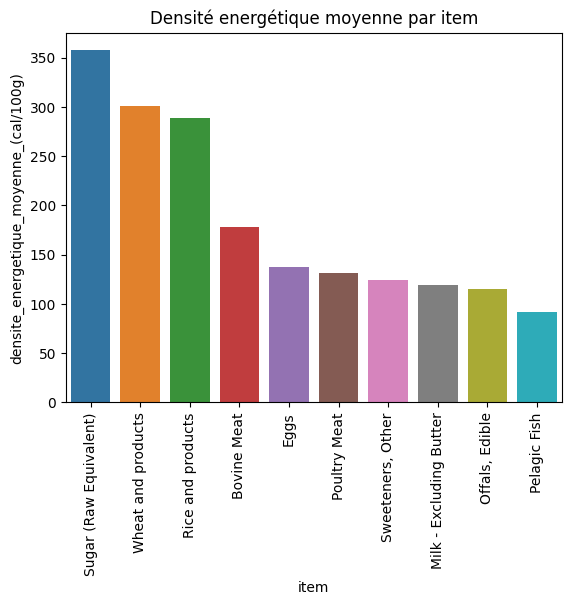

In [1065]:

plt.subplot()
ax = sns.barplot(x= df12_.index, y=df12_['densite_energetique_moyenne_(cal/100g)'])
plt.title('Densité energétique moyenne par item',)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

13. Quels sont les 10 aliments les plus riches en protéines ? Utiliser un diagramme à barres pour interpréter les résultats.

In [1054]:
df13 = df.groupby('item').mean()[['protein_coef_(%)']].sort_values(by='protein_coef_(%)', ascending=False).head(10)
df13

/tmp/ipykernel_38356/3756142359.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df13 = df.groupby('item').mean()[['protein_coef_(%)']].sort_values(by='protein_coef_(%)', ascending=False).head(10)


,protein_coef_(%)
item,
Rape and Mustardseed,23.971679
Peas,23.064966
"Pulses, Other and products",21.994364
Beans,21.910000
Groundnuts,20.383003
"Oilcrops, Other",18.264762
Soyabeans,17.863615
Cottonseed,17.822000
"Offals, Edible",17.591456


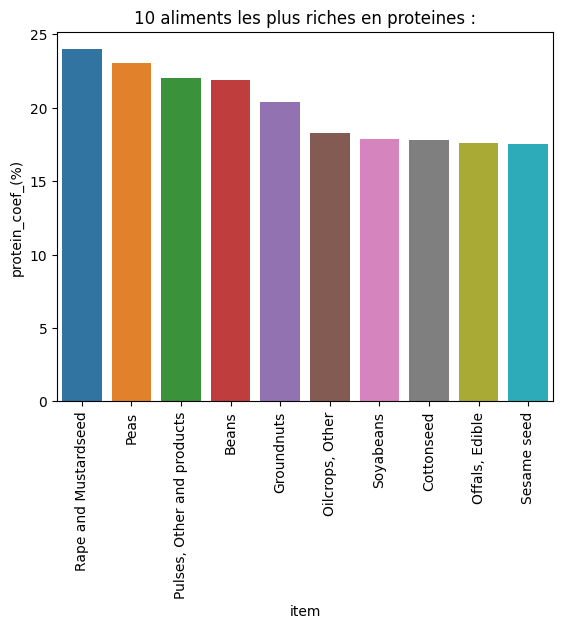

In [1063]:
# plt.figure(figsize=(10,5))
plt.subplot()
ax = sns.barplot(x= df13.index, y=df13['protein_coef_(%)'])
plt.title('10 aliments les plus riches en proteines :',)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

14. Créez une boîte à moustache de la quantité de nourriture disponible par habitant en kcal par zone géographique. Afin d’optimiser l’affichage modifier les éléments nécessaires si besoin :

In [1067]:
df14 = df.groupby('region').sum()[['food_supply_quantity_(kg/capita/yr)']]
df14

/tmp/ipykernel_38356/2085205161.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df14 = df.groupby('region').sum()[['food_supply_quantity_(kg/capita/yr)']]


,food_supply_quantity_(kg/capita/yr)
region,
australia_new_zealand,3343.27
caribbean,17174.21
central_america,9041.14
central_asia,8292.35
eastern_africa,15806.62
eastern_asia,11237.56
eastern_europe,16388.36
melanesia,6617.47
micronesia,2382.85


In [1066]:
df.columns

Index(['area_code', 'area', 'year', 'pop_1000_hab', 'type', 'item',
       'fat_supply_quantity_(g/capita/day)', 'food_supply_(kcal/capita/day)',
       'food_supply_quantity_(kg/capita/yr)',
       'protein_supply_quantity_(g/capita/day)', 'region',
       'taux_croissance_pop_18_19_(%)', 'densite_energetique_(cal/100g)',
       'densite_energetique_moyenne_(cal/100g)', 'protein_coef_(%)'],
      dtype='object')